In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

In [2]:

srate = 10000
dt = 1/srate
t = np.arange(0, 1, dt)

# sine and cosine wav  
lpf = np.sin(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*20*t)
lpf2 = np.sin(2*np.pi*10*t) + 0.5*np.cos(2*np.pi*20*t + np.pi/4)

# random noise 

noise1 = np.random.normal(0, 1, len(t))
noise2 = np.random.normal(0, 1, len(t)) 

X = lpf + noise1
Y = lpf2 + noise2

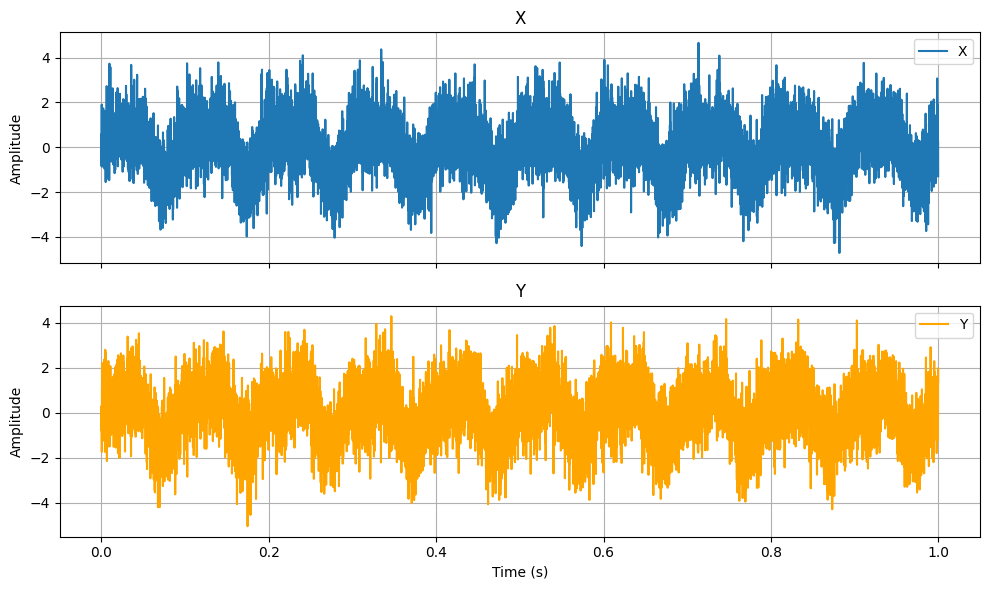

In [3]:

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axs[0].plot(t, X, label='X')
axs[0].set_title('X')
axs[0].set_ylabel('Amplitude')
axs[0].grid()
axs[0].legend()

axs[1].plot(t, Y, label='Y', color='orange')
axs[1].set_title('Y')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

In [11]:
win = 10*srate #window size 
overlap = 0*win 

nfft = 10*srate 

#Estimate the cross power 
# spectral density, Pxy, using Welch's method.
C , F = sp.signal.csd(X, Y, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)

# Estimate power spectral density using Welch's method.
Pxx, F2 = sp.signal.welch(X, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)


# Estimate power spectral density using a periodogram.
Pxx2 , F3 = sp.signal.periodogram(X, fs=srate, nfft=nfft) #detrand , return_onesided and scaling

# Estimate the magnitude squared coherence estimate, Cxy, of discrete-time signals X and Y using Welch's method.
Cxy , F4 = sp.signal.coherence(X, Y, fs=srate, nperseg=win, noverlap=overlap, nfft=nfft)


fX, tX, Sxx = sp.signal.spectrogram(X, fs=srate)
fY, tY, Syy = sp.signal.spectrogram(Y, fs=srate)


# convolve  Convolve two N-dimensional arrays
conv = sp.signal.convolve(X, Y, mode='full', method='auto') 
conv1 = sp.signal.convolve(X, Y, mode='full' , method='direct')
conv2 = sp.signal.convolve(X, Y, mode='full', method='fft')

 
# correlate Cross-correlate two N-dimensional arrays

convolve = sp.signal.convolve(X, Y, mode='full', method='auto')
convolve1 = sp.signal.convolve(X, Y, mode='full', method='direct')
convolve2 = sp.signal.convolve(X, Y, mode='full', method='fft')

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.correlate.html#scipy.signal.correlate
# fftconvolve  	Convolve two N-dimensional arrays using FFT

fftC = sp.signal.fftconvolve(X, Y, mode='full')
fftC1 = sp.signal.fftconvolve(X, Y, mode='valid')
fftC2 = sp.signal.fftconvolve(X, Y, mode='same')

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.fftconvolve.html#scipy.signal.fftconvolve

/home/rafael/anaconda3/envs/figas2/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 100000 is greater than input length  = 10000, using nperseg = 10000
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


(0.0, 200.0)

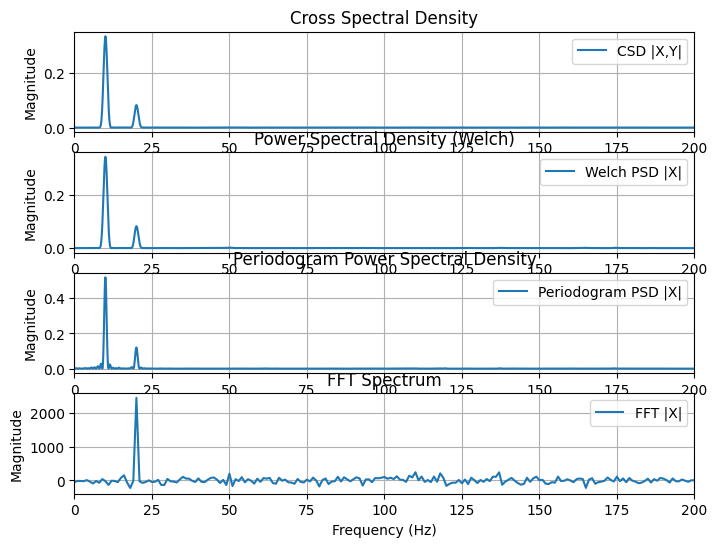

In [14]:
fig, ax = plt.subplots(4, 1, figsize=(8, 6))

ax[0].plot(C , np.abs(F), label='CSD |X,Y|')
ax[0].set_title('Cross Spectral Density')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Magnitude')
ax[0].grid()
ax[0].set_xlim(0, 200)
ax[0].legend()

ax[1].plot(Pxx , np.abs(F2), label='Welch PSD |X|')
ax[1].set_title('Power Spectral Density (Welch)')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()
ax[1].legend()
ax[1].set_xlim(0, 200)


ax[2].plot(Pxx2 , np.abs(F3), label='Periodogram PSD |X|')
ax[2].set_title('Periodogram Power Spectral Density')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Magnitude')
ax[2].grid()
ax[2].legend()
ax[2].set_xlim(0, 200)

fft = sp.fft.fft(X)
ax[3].plot(fft, label='FFT |X|')
ax[3].set_title('FFT Spectrum')
ax[3].set_xlabel('Frequency (Hz)')
ax[3].set_ylabel('Magnitude')
ax[3].grid()
ax[3].legend()
ax[3].set_xlim(0, 200)




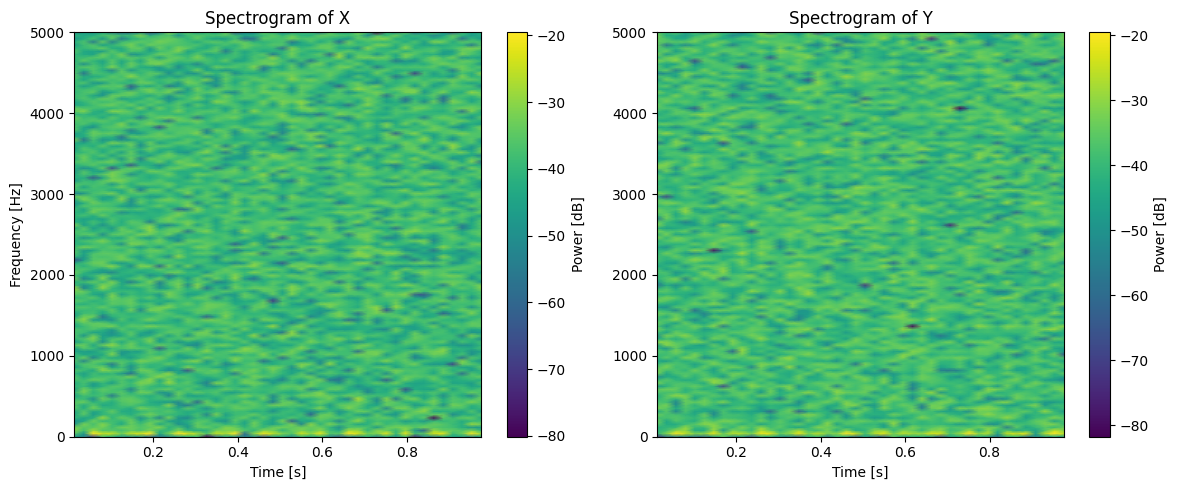

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pcolormesh(tX, fX, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram of X')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.subplot(1, 2, 2)
plt.pcolormesh(tY, fY, 10 * np.log10(Syy), shading='gouraud')
plt.title('Spectrogram of Y')
plt.xlabel('Time [s]')
plt.colorbar(label='Power [dB]')

plt.tight_layout()
plt.show()

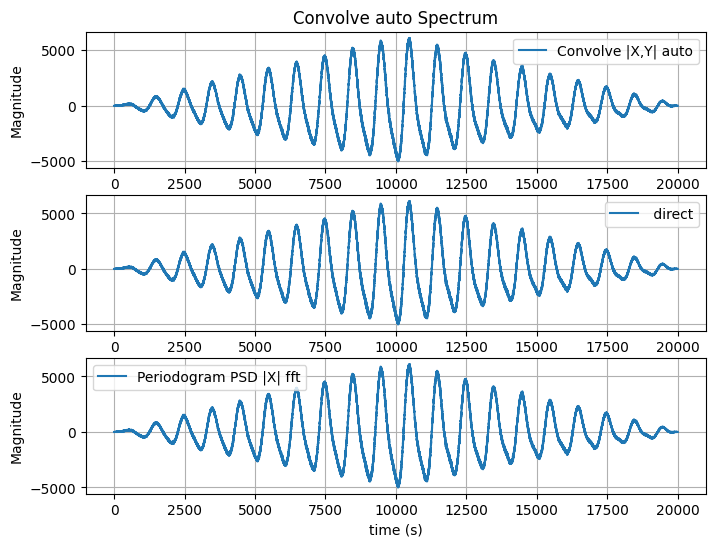

In [15]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))

ax[0].plot(conv, label='Convolve |X,Y| auto')
ax[0].set_title('Convolve auto Spectrum')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('Magnitude')
ax[0].grid()
#ax[0].set_xlim(0, 1000)
ax[0].legend()

ax[1].plot(conv1, label=' direct')
#ax[1].set_title('Convolve direct Spectrum')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()
ax[1].legend()
#ax[1].set_xlim(0, 3000)


ax[2].plot(conv2, label='Periodogram PSD |X| fft')
#ax[2].set_title('Convolve FFT Spectrum')
ax[2].set_xlabel('time (s)')
ax[2].set_ylabel('Magnitude')
ax[2].grid()
ax[2].legend()
#ax[2].set_xlim(0, 0000)

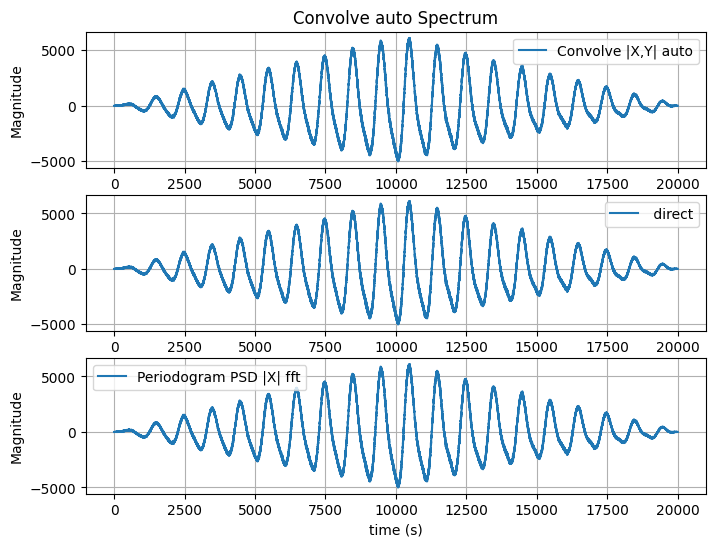

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))

ax[0].plot(convolve, label='Convolve |X,Y| auto')
ax[0].set_title('Convolve auto Spectrum')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('Magnitude')
ax[0].grid()
#ax[0].set_xlim(0, 1000)
ax[0].legend()

ax[1].plot(convolve1, label=' direct')
#ax[1].set_title('Convolve direct Spectrum')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()
ax[1].legend()
#ax[1].set_xlim(0, 3000)


ax[2].plot(convolve2, label='Periodogram PSD |X| fft')
#ax[2].set_title('Convolve FFT Spectrum')
ax[2].set_xlabel('time (s)')
ax[2].set_ylabel('Magnitude')
ax[2].grid()
ax[2].legend()

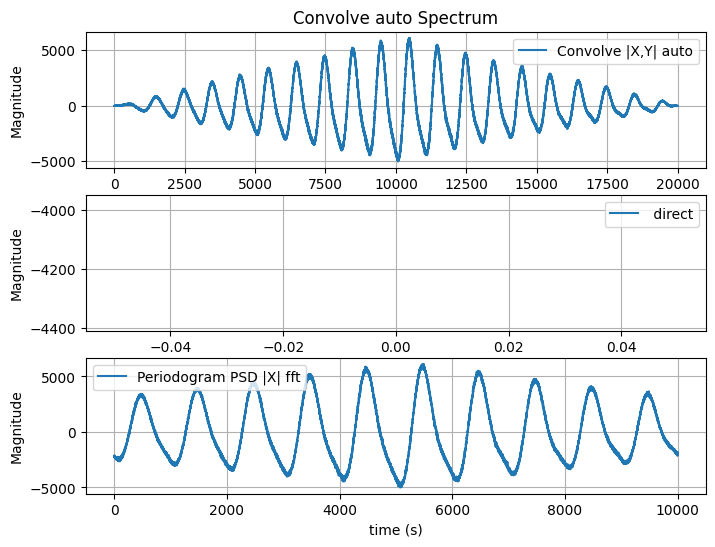

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(8, 6))

ax[0].plot(fftC, label='Convolve |X,Y| auto')
ax[0].set_title('Convolve auto Spectrum')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('Magnitude')
ax[0].grid()
#ax[0].set_xlim(0, 1000)
ax[0].legend()

ax[1].plot(fftC1, label=' direct')
#ax[1].set_title('Convolve direct Spectrum')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('Magnitude')
ax[1].grid()
ax[1].legend()
#ax[1].set_xlim(0, 3000)


ax[2].plot(fftC2, label='Periodogram PSD |X| fft')
#ax[2].set_title('Convolve FFT Spectrum')
ax[2].set_xlabel('time (s)')
ax[2].set_ylabel('Magnitude')
ax[2].grid()
ax[2].legend()

In [ ]:
#### Surrogados 
### Calcular pwelch
###  feito isso, aula 9 feita 